In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
breast_cancer = pd.read_csv("Dataset/cancer/wdbc.data",
                           names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
breast_cancer["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [6]:
X = breast_cancer[["radius_se","concave points_worst"]].values

In [7]:
Y = breast_cancer["diagnosis"].values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Traformazione Etichette Target

In [9]:
le = LabelEncoder()

In [10]:
Y_train = le.fit_transform(Y_train)

In [11]:
Y_test = le.transform(Y_test)

In [12]:
Y_train[:5]

array([0, 0, 0, 1, 0])

## Standardizziamo

In [13]:
ss = StandardScaler()

In [14]:
X_train = ss.fit_transform(X_train)

In [15]:
X_test = ss.transform(X_test)

## Regressione Logistica!

In [16]:
from sklearn.linear_model import LogisticRegression

### Implementa gia la Regolarizzazione

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(X_train, Y_train)

LogisticRegression()

## Test Modello Accuracy, LogLikeHood

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.metrics import log_loss

In [21]:
Y_pred = lr.predict(X_test)

In [22]:
Y_pred_proba = lr.predict_proba(X_test)

In [23]:
print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))

ACCURACY: 0.9064327485380117


### Inversa, Quindi minore è il risultato maggiore è buono il modello

In [24]:
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

LOG LOSS: 0.21522054203502763


## Decision Boundary

In [25]:
from viz import showBounds

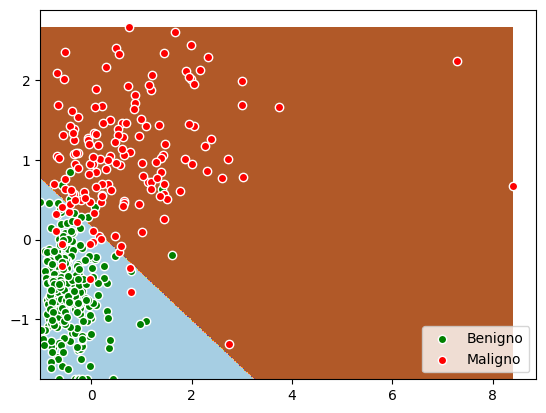

In [26]:
showBounds(lr, X_train, Y_train, labels=["Benigno","Maligno"])

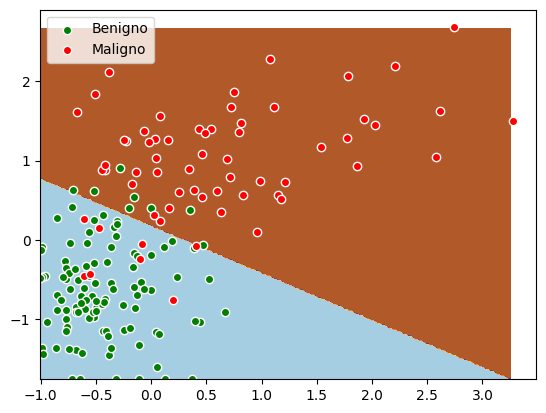

In [27]:
showBounds(lr, X_test, Y_test, labels=["Benigno","Maligno"])

In [28]:
X = breast_cancer.drop(["diagnosis","id"], axis=1).values

In [29]:
Y = breast_cancer["diagnosis"].values

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [31]:
le = LabelEncoder()

In [32]:
Y_train = le.fit_transform(Y_train)

In [33]:
Y_test = le.transform(Y_test)

In [34]:
ss = StandardScaler()

In [35]:
X_train = ss.fit_transform(X_train)

In [36]:
X_test = ss.transform(X_test)

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [39]:
Y_pred = lr.predict(X_test)

In [40]:
Y_pred_proba = lr.predict_proba(X_test)

In [41]:
print("ACCURACY: "+str(accuracy_score(Y_test, Y_pred)))

ACCURACY: 0.9766081871345029


In [42]:
print("LOG LOSS: "+str(log_loss(Y_test, Y_pred_proba)))

LOG LOSS: 0.08915736677274291


In [43]:
%load_ext autoreload
%autoreload 2